# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city, cloudiness, country, date, humidity, lat, lng, max_temp, wind_speed = ([] for i in range(9))
weather_data = dict()

for index, c in enumerate(cities, start=1):
    max_attempts = 10
    attempts = 0
    while attempts < max_attempts:
        url = "https://api.openweathermap.org/data/2.5/weather?q=" + c + "&appid=" + weather_api_key
        response = requests.get(url).json()
        if response['cod'] == 200:
            print(f'Processing record {index}, {c}')
            city.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            break

        elif response['cod'] == 429:
            print('API request limit, back off for 60 sec')  
            time.sleep((60) + random.random())
            attempts = attempts + 1

        else:
            print('City not found, skipping')
            break    

weather_data['City'] = city
weather_data['Cloudiness'] = cloudiness
weather_data['Country'] = country
weather_data['Date'] = date
weather_data['Humidity'] = humidity
weather_data['Lat'] = lat 
weather_data['Lng'] = lng
weather_data['Max Temp'] = max_temp
weather_data['Wind Speed'] = wind_speed
print('Completed!')

Processing record 1, palani
Processing record 2, villarrica
Processing record 3, leningradskiy
Processing record 4, cherkasskoye
Processing record 5, geraldton
Processing record 6, green valley
Processing record 7, busselton
Processing record 8, rikitea
Processing record 9, lorengau
Processing record 10, phillipsburg
Processing record 11, arraial do cabo
Processing record 12, bluff
City not found, skipping
Processing record 14, saskylakh
Processing record 15, fare
Processing record 16, bay city
City not found, skipping
Processing record 18, barrow
Processing record 19, te anau
Processing record 20, faanui
Processing record 21, yamada
Processing record 22, vredendal
Processing record 23, jamestown
Processing record 24, punta arenas
Processing record 25, kapit
Processing record 26, moose factory
Processing record 27, juegang
Processing record 28, quatre cocos
Processing record 29, avarua
Processing record 30, butaritari
Processing record 31, tomatlan
Processing record 32, hobart
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
(pd.DataFrame.from_dict(data=weather_data, orient='columns')).to_csv(output_data_file, header=True)
df = pd.read_csv(output_data_file)
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.count()

City          558
Cloudiness    558
Country       554
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [5]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Palani,2,IN,1585680676,39,10.47,77.53,299.11,2.13
1,Villarrica,73,PY,1585680676,35,-25.75,-56.43,308.62,0.95
2,Leningradskiy,86,RU,1585680676,92,69.38,178.42,256.16,0.82
3,Cherkasskoye,26,RU,1585680677,80,52.43,47.22,281.52,1.33
4,Geraldton,90,AU,1585680677,77,-28.77,114.60,291.15,4.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [6]:
def kelvin_to_fahrenheit(k):
    c = float(k) - 273.15
    f = c * (9/5) + 32
    return f

In [22]:
def draw_scatter(x_data, y_data, title, xlabel, ylabel, ylimit=None):
    fig, ax = plt.subplots()
    x = x_data
    y = y_data
    ax.scatter(x,y)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylimit)
    ax.grid(True)

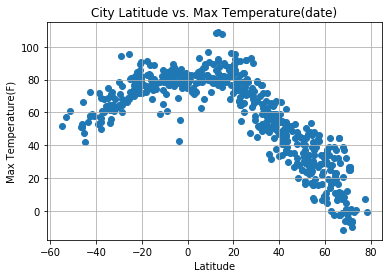

In [23]:
x = df['Lat']
y = df['Max Temp'].apply(kelvin_to_fahrenheit)
draw_scatter(x, y, 'City Latitude vs. Max Temperature(date)', 'Latitude', 'Max Temperature(F)')

#### Latitude vs. Humidity Plot

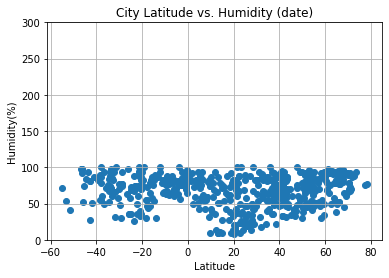

In [25]:
x = df['Lat']
y = df['Humidity']
draw_scatter(x, y, 'City Latitude vs. Humidity (date)', 'Latitude', 'Humidity(%)', (0,300))

**Latitude vs. Cloudiness Plot**

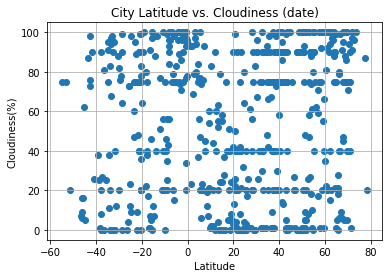

In [26]:
x = df['Lat']
y = df['Cloudiness']
draw_scatter(x, y, 'City Latitude vs. Cloudiness (date)', 'Latitude', 'Cloudiness(%)')

#### Latitude vs. Wind Speed Plot

In [13]:
def mps_to_mph(m):
    """ meter/second convert to mile/hour 
    """
    return 2.23694 * float(m)

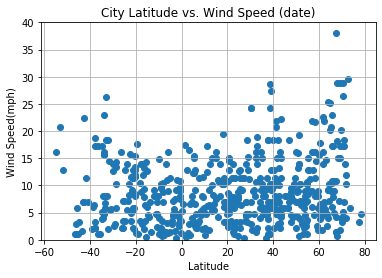

In [27]:
x = df['Lat']
y = df['Wind Speed'].apply(mps_to_mph)
draw_scatter(x, y, 'City Latitude vs. Wind Speed (date)', 'Latitude', 'Wind Speed(mph)', (0,40))

## Linear Regression

In [54]:
# OPTIONAL: Create a function to create Linear Regression plots
def draw_scatter_with_linear_reg(x, y, title, xlabel, ylabel, ylimit=None):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(f'slope: {slope:.2f}, intercept: {intercept:.2f}')
    label = f'Y = {slope:.2f}X + {intercept:.2f}'
    print(f'The r-squared is:{r_value**2:.2f}')
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    ax.plot(x, intercept + slope * x, 'r', label=label)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_ylim(ylimit)
    ax.legend()
    ax.grid(True)

In [58]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = df.loc[df['Lat'] >= 0]
southern_hemi_df = df.loc[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

slope: -1.23, intercept: 99.13
The r-squared is:0.82


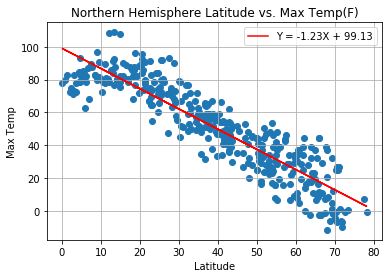

In [55]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp'].apply(kelvin_to_fahrenheit)
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Max Temp(F)', 'Latitude', 'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

slope: 0.54, intercept: 84.46
The r-squared is:0.46


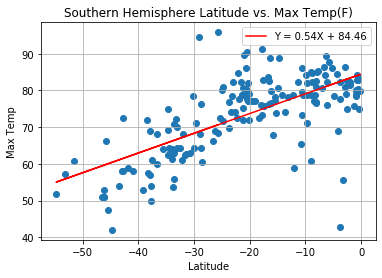

In [61]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp'].apply(kelvin_to_fahrenheit)
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Max Temp(F)', 'Latitude', 'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope: 0.39, intercept: 50.75
The r-squared is:0.11


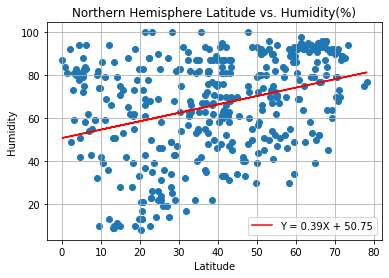

In [62]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Humidity(%)', 'Latitude', 'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

slope: 0.11, intercept: 75.52
The r-squared is:0.01


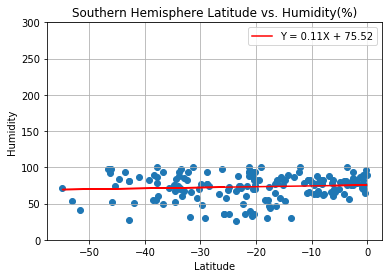

In [64]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Humidity(%)', 'Latitude', 'Humidity', (0,300))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope: 0.40, intercept: 36.10
The r-squared is:0.05


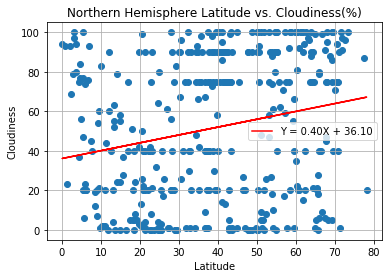

In [65]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Cloudiness(%)', 'Latitude', 'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

slope: 0.73, intercept: 72.82
The r-squared is:0.08


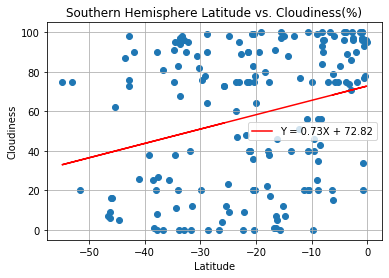

In [66]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Cloudiness(%)', 'Latitude', 'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope: 0.06, intercept: 6.61
The r-squared is:0.04


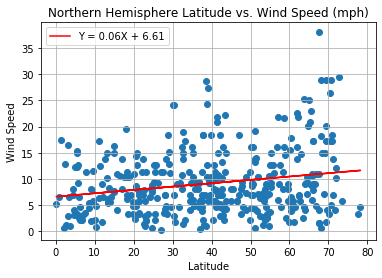

In [67]:
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed'].apply(mps_to_mph)
draw_scatter_with_linear_reg(x, y, 'Northern Hemisphere Latitude vs. Wind Speed (mph)', 'Latitude', 'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

slope: -0.08, intercept: 5.99
The r-squared is:0.04


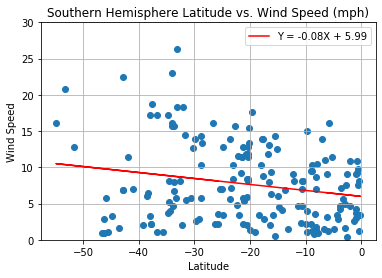

In [69]:
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed'].apply(mps_to_mph)
draw_scatter_with_linear_reg(x, y, 'Southern Hemisphere Latitude vs. Wind Speed (mph)', 'Latitude', 'Wind Speed', (0,30))